In [11]:
from IPython.core.display import display, HTML

html_code = """
<style>
    /* Contenedor principal con fondo del logo */
    .header-container {
        position: relative;
        background-image: url('https://upload.wikimedia.org/wikipedia/commons/archive/f/fb/20161010213812%21Escudo-UdeA.svg');
        background-size: contain;
        background-repeat: no-repeat;
        background-position: center;
        text-align: center;
        padding: 100px 40px;
        background-color: rgba(0, 0, 0, 0.7); /* Fondo oscuro semitransparente */
        border-radius: 10px;
    }

    /* Estilos del texto */
    .header-title {
        font-size: 32px;
        font-weight: bold;
        color: white;
    }

    .header-subtitle {
        font-size: 24px;
        font-weight: bold;
        color: white;
    }

    .header-info {
        font-size: 18px;
        font-weight: normal;
        color: white;
    }
</style>

<div class="header-container">
    <div class="header-title">📌 Fundamentos de Programación - 2025-I</div>
    <div class="header-subtitle">📊 Trabajo Final: Dólar Histórico en Colombia (1991-2024)</div>
    <br>
    <div class="header-info"><strong>👨‍🏫 Docente:</strong> Tomás Atheortua</div>
    <br>
    <div class="header-info">
        <strong>👨‍🎓 Alumnos:</strong> <br>
        1️⃣ Sergio Alejandro Laverde Peña (CC 1.152.217.871) <br>
        2️⃣ Jhon Alejandro Jaramillo Echeverri (CC 1.035.422.452) <br>
        3️⃣ Juan Andrés Ruiz Ramírez (CC 1.121.712.506)
    </div>
</div>
"""

display(HTML(html_code))


/tmp/ipykernel_2876769/2296569955.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


# Librerias Necesarias: 



In [80]:
# Librerias necesarias
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
#from pychow import ChowTest


<hr>

# Importacion DATA: 
### Fuente: Superintendencia financiera de colombia
### Tema: Tasa de Cambio Representativa del Mercado- TRM
### Link:
#### https://www.superfinanciera.gov.co/publicaciones/60819/informes-y-cifrascifrasestablecimientos-de-creditoinformacion-periodicadiariatasa-de-cambio-representativa-del-mercado-trm-60819/

<hr>

In [81]:
data = pd.read_csv('./Tasa_de_Cambio_Representativa_del_Mercado-_TRM.csv')
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7976 entries, 0 to 7975
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   VALOR          7976 non-null   float64
 1   UNIDAD         7976 non-null   object 
 2   VIGENCIADESDE  7976 non-null   object 
 3   VIGENCIAHASTA  7976 non-null   object 
dtypes: float64(1), object(3)
memory usage: 249.4+ KB


<hr>

## ¿Sabías que...?
### Cuando un día es sábado, domingo o festivo en Colombia, a tasa oficial (TRM) seguirá siendo la calculada en el último día que operó el mercado, y tendrá vigencia hasta el día siguiente.

<p><img src="TRM_Calendario.png" style="width: 80%; height: auto;"></p>
<hr>


In [82]:
data.head(10)

,VALOR,UNIDAD,VIGENCIADESDE,VIGENCIAHASTA
0,4100.66,COP,15/02/2025,18/02/2025
1,4161.46,COP,14/02/2025,14/02/2025
2,4165.07,COP,13/02/2025,13/02/2025
3,4153.80,COP,12/02/2025,12/02/2025
4,4132.93,COP,11/02/2025,11/02/2025
5,4113.70,COP,08/02/2025,10/02/2025
6,4150.99,COP,07/02/2025,07/02/2025
7,4180.06,COP,06/02/2025,06/02/2025
8,4153.54,COP,05/02/2025,05/02/2025
9,4198.66,COP,04/02/2025,04/02/2025


<hr>

# Estructuración DATA
## Reto: Completar todos los dias con su TRM respectiva

<hr>



In [83]:
data.index = pd.to_datetime((data['VIGENCIADESDE']), format='%d/%m/%Y') #Convierte VIGENCIADESDE en dato tipo Datetime, reemplaza indice numerico con fechas
data.sort_index(ascending=True, inplace=True) #Ordena DF según indice, ascendente y modificando el DF directamente
data.head(10)

,VALOR,UNIDAD,VIGENCIADESDE,VIGENCIAHASTA
VIGENCIADESDE,,,,
1991-12-02,643.42,COP,02/12/1991,02/12/1991
1991-12-03,639.22,COP,03/12/1991,03/12/1991
1991-12-04,635.70,COP,04/12/1991,04/12/1991
1991-12-05,631.51,COP,05/12/1991,05/12/1991
1991-12-06,627.16,COP,06/12/1991,06/12/1991
1991-12-07,638.06,COP,07/12/1991,09/12/1991
1991-12-10,622.92,COP,10/12/1991,10/12/1991
1991-12-11,627.46,COP,11/12/1991,11/12/1991
1991-12-12,633.09,COP,12/12/1991,12/12/1991


In [84]:
full_dates = pd.date_range(min(data.index), max(data.index)) # Se crea fechas intermedias, incluso las que no estaban
data = data.reindex(full_dates) #Cambia el índice del DataFrame para que incluya todas las fechas en full_dates.
data.head(15)


,VALOR,UNIDAD,VIGENCIADESDE,VIGENCIAHASTA
1991-12-02,643.42,COP,02/12/1991,02/12/1991
1991-12-03,639.22,COP,03/12/1991,03/12/1991
1991-12-04,635.70,COP,04/12/1991,04/12/1991
1991-12-05,631.51,COP,05/12/1991,05/12/1991
1991-12-06,627.16,COP,06/12/1991,06/12/1991
1991-12-07,638.06,COP,07/12/1991,09/12/1991
1991-12-08,NaN,NaN,NaN,NaN
1991-12-09,NaN,NaN,NaN,NaN
1991-12-10,622.92,COP,10/12/1991,10/12/1991
1991-12-11,627.46,COP,11/12/1991,11/12/1991


<hr>
<h2>Calendario Diciembre 1991</h2>
<p><img src="Calendario_1991.png" style="width: 20%; display: block; margin: auto;"></p>
<hr>


In [85]:
data.ffill(inplace=True) # Rellena los valores faltantes (NaN) con el último valor disponible.
data.head(-1)


,VALOR,UNIDAD,VIGENCIADESDE,VIGENCIAHASTA
1991-12-02,643.42,COP,02/12/1991,02/12/1991
1991-12-03,639.22,COP,03/12/1991,03/12/1991
1991-12-04,635.70,COP,04/12/1991,04/12/1991
1991-12-05,631.51,COP,05/12/1991,05/12/1991
1991-12-06,627.16,COP,06/12/1991,06/12/1991
...,...,...,...,...
2025-02-10,4113.70,COP,08/02/2025,10/02/2025
2025-02-11,4132.93,COP,11/02/2025,11/02/2025
2025-02-12,4153.80,COP,12/02/2025,12/02/2025
2025-02-13,4165.07,COP,13/02/2025,13/02/2025


<hr>

# Visualización historica TRM 
<hr>


<Axes: title={'center': 'Dólar Histórico en Colombia (1991-2024)'}, xlabel='None', ylabel='VALOR'>

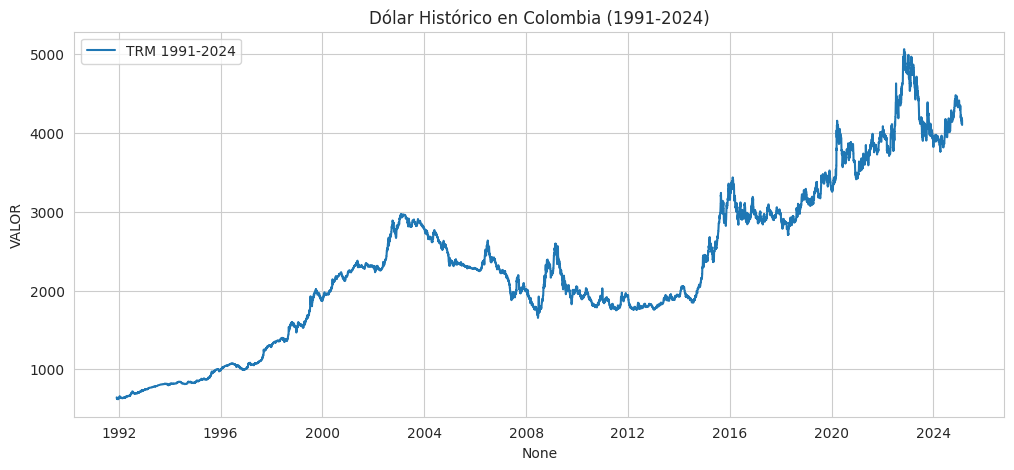

In [86]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 5))
plt.title("Dólar Histórico en Colombia (1991-2024)")
sns.lineplot(
    label = 'TRM 1991-2024',
    y = data['VALOR'],
    x = data.index
)

<hr>
<h2>Acontecimientos Historicos</h2>

<hr>


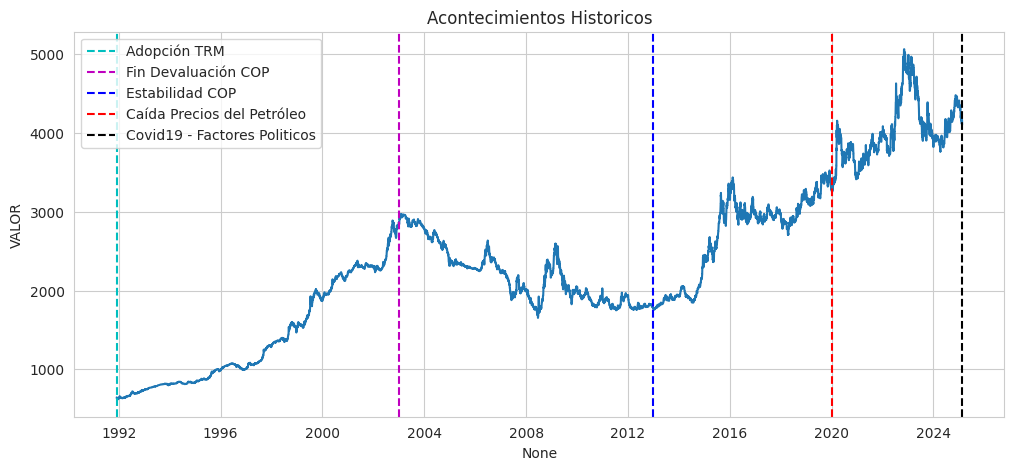

In [87]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 5))
sns.lineplot(
    #label = 'TRM 1991-2024',
    y = data['VALOR'],
    x = data.index
)

# Agregar líneas verticales con etiquetas
plt.title("Acontecimientos Historicos")
plt.axvline(x=min(data.index), color="c", linestyle="--", label="Adopción TRM")
plt.axvline(x=pd.Timestamp("2003-01-01"), color="m", linestyle="--", label="Fin Devaluación COP")
plt.axvline(x=pd.Timestamp("2013-01-01"), color="b", linestyle="--", label="Estabilidad COP")
plt.axvline(x=pd.Timestamp("2019-12-31"), color="r", linestyle="--", label="Caída Precios del Petróleo")
plt.axvline(x=max(data.index), color="k", linestyle="--", label="Covid19 - Factores Politicos")


# Mostrar leyenda
plt.legend()
# Mostrar gráfico
plt.show()

<hr>
<h2>¿Alguna relación Politica?</h2>

<hr>


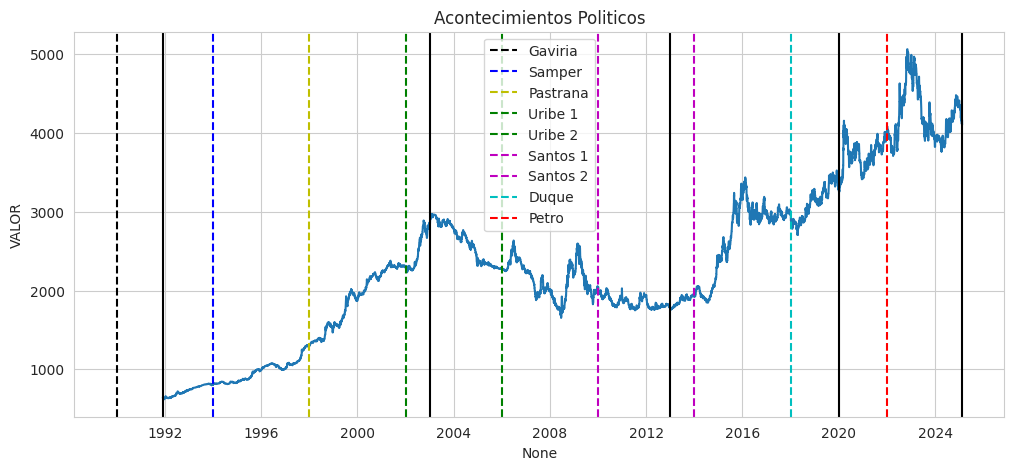

In [88]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 5))
sns.lineplot(
    #label = 'TRM 1991-2024',
    y = data['VALOR'],
    x = data.index
)

# Agregar líneas verticales con etiquetas
plt.title("Acontecimientos Politicos")
plt.axvline(x=min(data.index), color="k", linestyle="-")
plt.axvline(x=pd.Timestamp("2003-01-01"), color="k", linestyle="-")
plt.axvline(x=pd.Timestamp("2013-01-01"), color="k", linestyle="-")
plt.axvline(x=pd.Timestamp("2019-12-31"), color="k", linestyle="-")
plt.axvline(x=max(data.index), color="k", linestyle="-")
#politico
plt.axvline(x=pd.Timestamp("1990-01-01"), color="k", linestyle="--", label = "Gaviria")
plt.axvline(x=pd.Timestamp("1994-01-01"), color="b", linestyle="--", label = "Samper")
plt.axvline(x=pd.Timestamp("1998-01-01"), color="y", linestyle="--", label = "Pastrana")
plt.axvline(x=pd.Timestamp("2002-01-01"), color="g", linestyle="--", label = "Uribe 1")
plt.axvline(x=pd.Timestamp("2006-01-01"), color="g", linestyle="--", label = "Uribe 2")
plt.axvline(x=pd.Timestamp("2010-01-01"), color="m", linestyle="--", label = "Santos 1")
plt.axvline(x=pd.Timestamp("2014-01-01"), color="m", linestyle="--", label = "Santos 2")
plt.axvline(x=pd.Timestamp("2018-01-01"), color="c", linestyle="--", label = "Duque")
plt.axvline(x=pd.Timestamp("2022-01-01"), color="r", linestyle="--", label = "Petro")



# Mostrar leyenda
plt.legend()
# Mostrar gráfico
plt.show()

# Análisis gráfico exploratorio por segmentos


In [89]:
data

,VALOR,UNIDAD,VIGENCIADESDE,VIGENCIAHASTA
1991-12-02,643.42,COP,02/12/1991,02/12/1991
1991-12-03,639.22,COP,03/12/1991,03/12/1991
1991-12-04,635.70,COP,04/12/1991,04/12/1991
1991-12-05,631.51,COP,05/12/1991,05/12/1991
1991-12-06,627.16,COP,06/12/1991,06/12/1991
...,...,...,...,...
2025-02-11,4132.93,COP,11/02/2025,11/02/2025
2025-02-12,4153.80,COP,12/02/2025,12/02/2025
2025-02-13,4165.07,COP,13/02/2025,13/02/2025
2025-02-14,4161.46,COP,14/02/2025,14/02/2025


In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12130 entries, 1991-12-02 to 2025-02-15
Freq: D
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   VALOR          12130 non-null  float64
 1   UNIDAD         12130 non-null  object 
 2   VIGENCIADESDE  12130 non-null  object 
 3   VIGENCIAHASTA  12130 non-null  object 
dtypes: float64(1), object(3)
memory usage: 473.8+ KB


Text(0, 0.5, 'Hola')

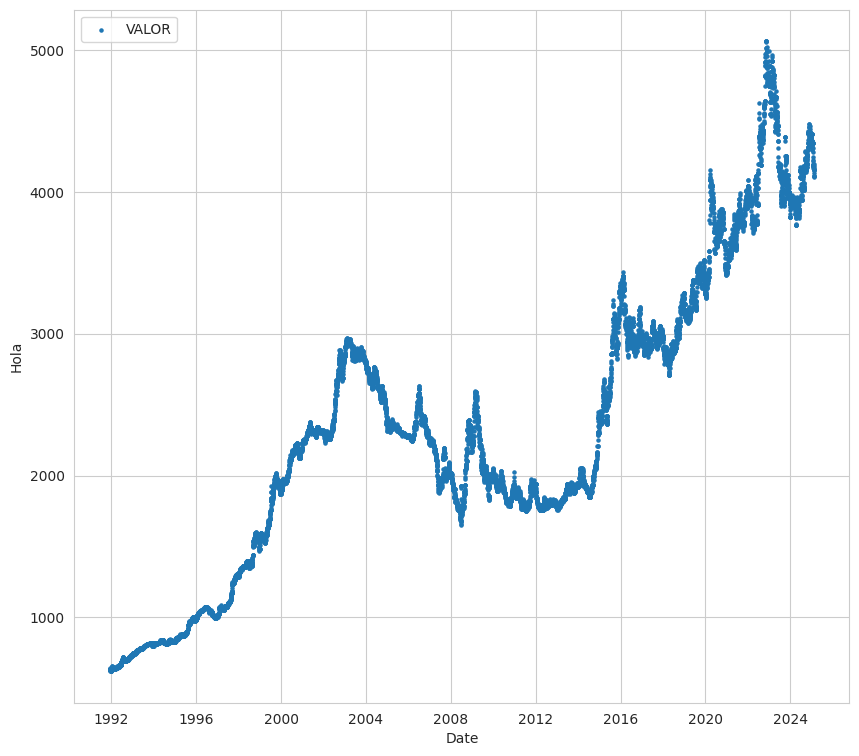

In [93]:
plt.figure(figsize = (10, 9))

lw = 5
alpha = 1

for column in data.columns:
    if column in ['UNIDAD', 'VIGENCIADESDE', 'VIGENCIAHASTA','diff']:
        continue
    plt.scatter(data.index, data[column], label = column, s = lw, alpha = alpha)
    lw -= 0.6
    alpha -= 0.3

plt.legend()
plt.xlabel('Date');
plt.ylabel('Hola')

In [94]:
data

,VALOR,UNIDAD,VIGENCIADESDE,VIGENCIAHASTA
1991-12-02,643.42,COP,02/12/1991,02/12/1991
1991-12-03,639.22,COP,03/12/1991,03/12/1991
1991-12-04,635.70,COP,04/12/1991,04/12/1991
1991-12-05,631.51,COP,05/12/1991,05/12/1991
1991-12-06,627.16,COP,06/12/1991,06/12/1991
...,...,...,...,...
2025-02-11,4132.93,COP,11/02/2025,11/02/2025
2025-02-12,4153.80,COP,12/02/2025,12/02/2025
2025-02-13,4165.07,COP,13/02/2025,13/02/2025
2025-02-14,4161.46,COP,14/02/2025,14/02/2025


In [97]:
data_d = data.resample('D').agg({
    "VIGENCIADESDE": "first",
    "VIGENCIAHASTA":"last",
    "VALOR": "max"
})
data_d

,VIGENCIADESDE,VIGENCIAHASTA,VALOR
1991-12-02,02/12/1991,02/12/1991,643.42
1991-12-03,03/12/1991,03/12/1991,639.22
1991-12-04,04/12/1991,04/12/1991,635.70
1991-12-05,05/12/1991,05/12/1991,631.51
1991-12-06,06/12/1991,06/12/1991,627.16
...,...,...,...
2025-02-11,11/02/2025,11/02/2025,4132.93
2025-02-12,12/02/2025,12/02/2025,4153.80
2025-02-13,13/02/2025,13/02/2025,4165.07
2025-02-14,14/02/2025,14/02/2025,4161.46


In [ ]:
plt.figure(figsize = (10, 9))

lw = 2
alpha = 1

for column in data_d.columns:
    if column in ['']:
        continue
    elif column == 'volume':
        plt.plot(df_w.index, df_w[column] / 10000, label = f"{column} $/10^4$", linewidth = 3, alpha = 0.5)
    else:
        plt.plot(df_w.index, df_w[column], label = column, linewidth = lw, alpha = alpha)
    lw -= 0.6
    alpha -= 0.2

plt.legend()
plt.xlabel('Date');

In [47]:
# Crear la columna 'diff' si no existe

# Iterar sobre las filas del DataFrame (empezando desde la segunda fila)
for i in range(1, len(data)):
    data.loc[i, 'diff'] = data.loc[i, 'VALOR'] - data.loc[i - 1, 'VALOR']

KeyError: 1

In [39]:
data_d = data.resample('D').agg({
    "VALOR": "mean"
})
data_d.head(15)

,VALOR
1991-12-02,643.42
1991-12-03,639.22
1991-12-04,635.70
1991-12-05,631.51
1991-12-06,627.16
1991-12-07,638.06
1991-12-08,638.06
1991-12-09,638.06
1991-12-10,622.92
1991-12-11,627.46


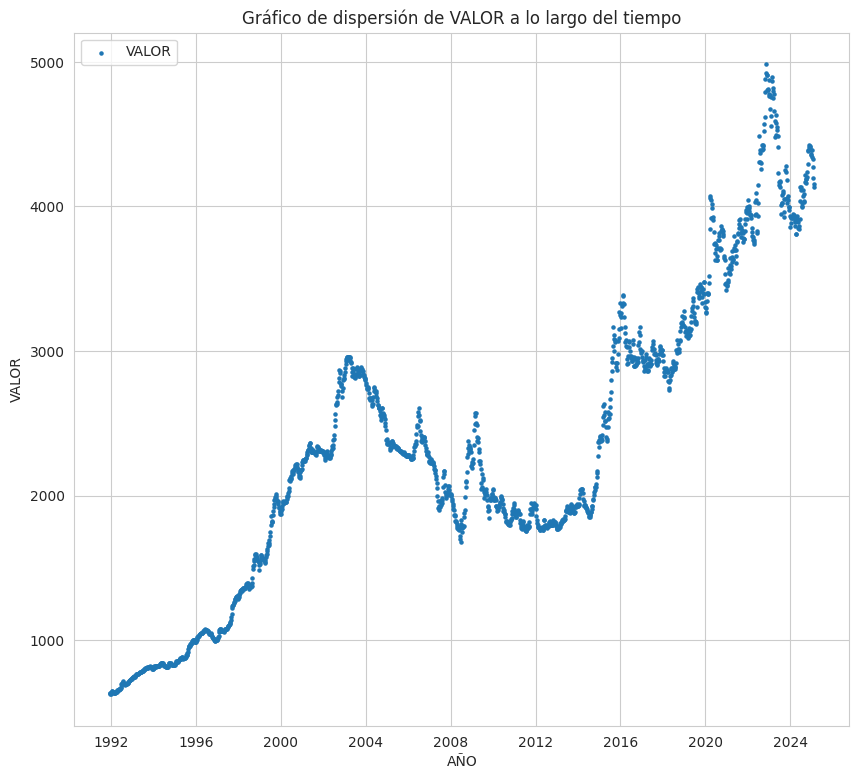

In [38]:
#Configuración del tamaño de la figura
plt.figure(figsize=(10, 9))

# Parámetros iniciales para el tamaño y la transparencia de los puntos
lw = 5  # Tamaño inicial de los puntos
alpha = 1  # Transparencia inicial (totalmente opaco)

# Iterar sobre las columnas del DataFrame
for column in data_d.columns:
    # Solo graficar si la columna es "VALOR"
    if column == "VALOR":
        plt.scatter(
            data_d.index,  # Eje X: Fechas (índice del DataFrame)
            data_d[column],  # Eje Y: Valores de la columna "VALOR"
            label=column,  # Etiqueta para la leyenda
            s=lw,  # Tamaño de los puntos
            alpha=alpha  # Transparencia de los puntos
        )
        # Reducir el tamaño y la transparencia para el siguiente punto (si hubiera más columnas)
        lw -= 0.6
        alpha -= 0.3

# Añadir leyenda, etiquetas y título
plt.legend()
plt.xlabel('AÑO')
plt.ylabel('VALOR')
plt.title('Gráfico de dispersión de VALOR a lo largo del tiempo')

# Mostrar el gráfico
plt.show()